<a href="https://colab.research.google.com/github/Kdavis2025/Projects/blob/main/Project_2_RMSPE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 2: Housing Price Prediction

## Problem Definition


###Business Problem


---


The main business goal is accurately predicting house sale prices based on various property features. Accurate price predictions are crucial for:

1.  Real estate agencies to provide reliable pricing guidance.
2.  Property investors to assess market value and make informed investment decisions.
3. Homeowners and buyers to negotiate fair deals based on objective price estimation.

By *minimizing* the **Root Mean Squared Percentage Error** (RMSPE), the goal is to improve the accuracy of predictions, which can enhance pricing strategies, increase sales efficiency, and reduce financial risk in the housing market.

### Data Science Problem


---


This is a supervised learning problem becuase:

1.   We have historical sales data where the house prices (target variable: SalePrice) are known.
2.   The model will learn from past house sales to predict prices for new/unseen houses.


### Data Overview


---


Data set contains information from the
Assessor's Office used in computing assessed values for individual residential properties sold from 2006 to 2010


*  Size of Dataset:* ~ 1.6MB
*  Datatype Breakdown: float64(11), int64(27), object(43)
*  2637 Entries: 0 to 2636
*  5 Rows | 81 Columns : 23 nominal, 23 ordinal, 14 discrete, and 21 continuous variables

This is a multiple linear regression problem because:

1. There is one continuous (non categorical) dependent variable (SalePrice), meaning the model ***needs*** to predict a numeric outcome.
2. There are multiple independent variables (features like Overall Qual, Gr Liv Area, etc.) used to predict SalePrice.



***Problem Statement***


---


We want to predict the house sales price (SalePrice) based on a minimal subset of predictors while minimizing the root mean squared percentage error (RMSPE). Although many features are available, domain knowledge (and exploratory analysis) often shows that variables like the overall quality of the house (Overall Qual) alongside the overall condition (Overall Cond) and the above‐ground living area (Gr Liv Area) are very strong predictors.

***Note:*** Additional variables might help further improve the performance, but here we focus on a minimal model for interpretability.

## Data Collection/Sources


Python Libraries Imported to conduct analysis

In [ ]:
!pip install pdfplumber # Install library to handle pdf files

# Data Handling
import pandas as pd # For data manipulation and analysis
import numpy as np # For numerical computations
import pdfplumber # For extracting text from pdf files
#Preprocessing
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
# Visualization
import matplotlib.pyplot as plt # For creating plots
import seaborn as sns # For statistical data visualization
# Regression Modeling
from statsmodels.stats.outliers_influence import variance_inflation_factor # For calculating and plotting VIF values helps quantify multicollinearity
from sklearn.model_selection import train_test_split # For splitting data into training and test sets
from sklearn.linear_model import LinearRegression # For linear regression modeling
from sklearn.metrics import mean_squared_error, r2_score # For evaluating the regression model
#Regression modeling Evaluation
from sklearn.metrics import make_scorer # For creating a custom scorer function
from sklearn.model_selection import cross_val_score # For analyzing performance of cross validation

Load and review the Housing Library from AWS S3 Libraries

In [ ]:
# Load and review the Housing Dictionary pdf for analysis
with pdfplumber.open("/content/Housing - Data Documentation.pdf") as pdf:
 for page in pdf.pages:
        all_text = page.extract_text() + "\n"  # Appends text with a newline for separation
        print(all_text)  # Prints the combined text from all pages

SIZE: 2930 observations, 82 variables
DESCRIPTIVE ABSTRACT: Data set contains information from the
Assessor's Office used in computing assessed values for individual
residential properties sold from 2006 to 2010.
VARIABLE DESCRIPTIONS:
Tab characters are used to separate variables in the data file. The
data has 82 columns which include 23 nominal, 23 ordinal, 14 discrete,
and 20 continuous variables (and 2 additional observation
identifiers).
Order (Discrete): Observation number
PID (Nominal): Parcel identification number
MS SubClass (Nominal): Identifies the type of dwelling involved in the
sale.
020 1-STORY 1946 & NEWER ALL STYLES
030 1-STORY 1945 & OLDER
040 1-STORY W/FINISHED ATTIC ALL AGES
045 1-1/2 STORY - UNFINISHED ALL AGES
050 1-1/2 STORY FINISHED ALL AGES
060 2-STORY 1946 & NEWER
070 2-STORY 1945 & OLDER
075 2-1/2 STORY ALL AGES
080 SPLIT OR MULTI-LEVEL
085 SPLIT FOYER
090 DUPLEX - ALL STYLES AND AGES
120 1-STORY PUD (Planned Unit Development) - 1946 & NEWER
150 1-1/2 STORY P

Load and review the Housing Data from the AWS S3 Libraries

In [ ]:
# load housing data into a data frame
housing_data = pd.read_csv('https://ddc-datascience.s3.amazonaws.com/Projects/Project.2-Housing/Data/Housing.Data.csv')
housing_data.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,905101070,20,RL,62.0,14299,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,7,2007,WD,Normal,115400
1,905101330,90,RL,72.0,10791,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,Shed,500,10,2006,WD,Normal,90000
2,903454090,50,RM,50.0,9000,Pave,NaN,Reg,Bnk,AllPub,...,0,NaN,NaN,NaN,0,12,2007,WD,Normal,141000
3,533244030,60,FV,68.0,7379,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,254000
4,909252020,70,RL,60.0,7200,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,4,2009,WD,Normal,155000


In [ ]:
# Check the end of the dataset for integrity
housing_data.tail()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
2632,903231070,50,RM,52.0,6240,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,400,9,2006,WD,Normal,114500
2633,906201021,80,RL,74.0,10778,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2009,WD,Normal,162000
2634,533253070,120,RL,61.0,3782,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2009,WD,Normal,211500
2635,527376100,20,RL,78.0,10140,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,8,2009,WD,Normal,165000
2636,528292060,60,RL,41.0,12460,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,225000


## Data Cleaning


Review the Data set in its entirety to clean and parse data for our regression model

In [ ]:
# Display the Data set to analyze contents, size and layout. Also, to establish features, targets, nulls or missing info
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2637 entries, 0 to 2636
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2637 non-null   int64  
 1   MS SubClass      2637 non-null   int64  
 2   MS Zoning        2637 non-null   object 
 3   Lot Frontage     2188 non-null   float64
 4   Lot Area         2637 non-null   int64  
 5   Street           2637 non-null   object 
 6   Alley            180 non-null    object 
 7   Lot Shape        2637 non-null   object 
 8   Land Contour     2637 non-null   object 
 9   Utilities        2637 non-null   object 
 10  Lot Config       2637 non-null   object 
 11  Land Slope       2637 non-null   object 
 12  Neighborhood     2637 non-null   object 
 13  Condition 1      2637 non-null   object 
 14  Condition 2      2637 non-null   object 
 15  Bldg Type        2637 non-null   object 
 16  House Style      2637 non-null   object 
 17  Overall Qual  

Which values within our dataset has null values?

In [ ]:
# Check Data set for null values
housing_data.isnull().sum()

,0
PID,0
MS SubClass,0
MS Zoning,0
Lot Frontage,449
Lot Area,0
...,...
Mo Sold,0
Yr Sold,0
Sale Type,0
Sale Condition,0


In [ ]:
# Drop NAs in Data
housing_data.isna().sum()

,0
PID,0
MS SubClass,0
MS Zoning,0
Lot Frontage,449
Lot Area,0
...,...
Mo Sold,0
Yr Sold,0
Sale Type,0
Sale Condition,0


In [ ]:
# Review Data to validate NA removal
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2637 entries, 0 to 2636
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2637 non-null   int64  
 1   MS SubClass      2637 non-null   int64  
 2   MS Zoning        2637 non-null   object 
 3   Lot Frontage     2188 non-null   float64
 4   Lot Area         2637 non-null   int64  
 5   Street           2637 non-null   object 
 6   Alley            180 non-null    object 
 7   Lot Shape        2637 non-null   object 
 8   Land Contour     2637 non-null   object 
 9   Utilities        2637 non-null   object 
 10  Lot Config       2637 non-null   object 
 11  Land Slope       2637 non-null   object 
 12  Neighborhood     2637 non-null   object 
 13  Condition 1      2637 non-null   object 
 14  Condition 2      2637 non-null   object 
 15  Bldg Type        2637 non-null   object 
 16  House Style      2637 non-null   object 
 17  Overall Qual  

In [ ]:
#Drop all columns with na
housing_data.dropna(axis=1, inplace=True)
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2637 entries, 0 to 2636
Data columns (total 55 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   PID              2637 non-null   int64 
 1   MS SubClass      2637 non-null   int64 
 2   MS Zoning        2637 non-null   object
 3   Lot Area         2637 non-null   int64 
 4   Street           2637 non-null   object
 5   Lot Shape        2637 non-null   object
 6   Land Contour     2637 non-null   object
 7   Utilities        2637 non-null   object
 8   Lot Config       2637 non-null   object
 9   Land Slope       2637 non-null   object
 10  Neighborhood     2637 non-null   object
 11  Condition 1      2637 non-null   object
 12  Condition 2      2637 non-null   object
 13  Bldg Type        2637 non-null   object
 14  House Style      2637 non-null   object
 15  Overall Qual     2637 non-null   int64 
 16  Overall Cond     2637 non-null   int64 
 17  Year Built       2637 non-null   

In [ ]:
housing_data['Sale Condition'].unique()

array(['Normal', 'Partial', 'Abnorml', 'Alloca', 'AdjLand', 'Family'],
      dtype=object)

Remove all columns from our analysis with missing or null values (***except:*** SalePrice, Overall Qual, Overall Cond, and Gr Liv Area) that will not be used in this model.  



**Note:** The simplist way to proform this step is to define the housing data set with the columns that we want to work with.

This is the tedious way to do it: *housing_data.drop('irrelevant_columns_here', axis=1, inplace=True)*

In [ ]:
housing_data = housing_data[['SalePrice', 'Overall Qual','Gr Liv Area', 'Overall Cond','MS Zoning', 'Neighborhood']]
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2637 entries, 0 to 2636
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   SalePrice     2637 non-null   int64 
 1   Overall Qual  2637 non-null   int64 
 2   Gr Liv Area   2637 non-null   int64 
 3   Overall Cond  2637 non-null   int64 
 4   MS Zoning     2637 non-null   object
 5   Neighborhood  2637 non-null   object
dtypes: int64(4), object(2)
memory usage: 123.7+ KB


One Hot Encoding

In [ ]:
# Convert Neighborhood into one hot encoding
housing_data = pd.get_dummies(housing_data, columns=['Neighborhood'])
housing_data.info()






<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2637 entries, 0 to 2636
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   SalePrice             2637 non-null   int64 
 1   Overall Qual          2637 non-null   int64 
 2   Gr Liv Area           2637 non-null   int64 
 3   Overall Cond          2637 non-null   int64 
 4   MS Zoning             2637 non-null   object
 5   Neighborhood_Blmngtn  2637 non-null   bool  
 6   Neighborhood_Blueste  2637 non-null   bool  
 7   Neighborhood_BrDale   2637 non-null   bool  
 8   Neighborhood_BrkSide  2637 non-null   bool  
 9   Neighborhood_ClearCr  2637 non-null   bool  
 10  Neighborhood_CollgCr  2637 non-null   bool  
 11  Neighborhood_Crawfor  2637 non-null   bool  
 12  Neighborhood_Edwards  2637 non-null   bool  
 13  Neighborhood_Gilbert  2637 non-null   bool  
 14  Neighborhood_Greens   2637 non-null   bool  
 15  Neighborhood_GrnHill  2637 non-null   

In [ ]:
# Remove redundant column Neighborhood after one hot encoding
housing_data.drop('Neighborhood_Blmngtn', axis=1, inplace=True)
housing_data.drop('Neighborhood_Blueste', axis=1, inplace=True)
housing_data.drop('Neighborhood_BrDale', axis=1, inplace=True)
housing_data.drop('Neighborhood_BrkSide', axis=1, inplace=True)
housing_data.drop('Neighborhood_ClearCr', axis=1, inplace=True)
housing_data.drop('Neighborhood_CollgCr', axis=1, inplace=True)
housing_data.drop('Neighborhood_Crawfor', axis=1, inplace=True)
housing_data.drop('Neighborhood_Edwards', axis=1, inplace=True)
housing_data.drop('Neighborhood_Gilbert', axis=1, inplace=True)
housing_data.drop('Neighborhood_Greens', axis=1, inplace=True)
housing_data.drop('Neighborhood_GrnHill', axis=1, inplace=True)
housing_data.drop('Neighborhood_IDOTRR', axis=1, inplace=True)
housing_data.drop('Neighborhood_Landmrk', axis=1, inplace=True)
housing_data.drop('Neighborhood_MeadowV', axis=1, inplace=True)
housing_data.drop('Neighborhood_Mitchel', axis=1, inplace=True)
housing_data.drop('Neighborhood_NPkVill', axis=1, inplace=True)
housing_data.drop('Neighborhood_NWAmes', axis=1, inplace=True)
housing_data.drop('Neighborhood_NoRidge', axis=1, inplace=True)
housing_data.drop('Neighborhood_NridgHt', axis=1, inplace=True)
housing_data.drop('Neighborhood_OldTown', axis=1, inplace=True)
housing_data.drop('Neighborhood_SWISU', axis=1, inplace=True)
housing_data.drop('Neighborhood_Sawyer', axis=1, inplace=True)
housing_data.drop('Neighborhood_SawyerW', axis=1, inplace=True)
housing_data.drop('Neighborhood_Somerst', axis=1, inplace=True)
housing_data.drop('Neighborhood_StoneBr', axis=1, inplace=True)
housing_data.drop('Neighborhood_Timber', axis=1, inplace=True)
housing_data.drop('Neighborhood_Veenker', axis=1, inplace=True)
housing_data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2637 entries, 0 to 2636
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   SalePrice           2637 non-null   int64 
 1   Overall Qual        2637 non-null   int64 
 2   Gr Liv Area         2637 non-null   int64 
 3   Overall Cond        2637 non-null   int64 
 4   MS Zoning           2637 non-null   object
 5   Neighborhood_NAmes  2637 non-null   bool  
dtypes: bool(1), int64(4), object(1)
memory usage: 105.7+ KB


In [ ]:
# Convert MS Zoning into one hot encoding
housing_data = pd.get_dummies(housing_data, columns=['MS Zoning'])
housing_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2637 entries, 0 to 2636
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   SalePrice           2637 non-null   int64
 1   Overall Qual        2637 non-null   int64
 2   Gr Liv Area         2637 non-null   int64
 3   Overall Cond        2637 non-null   int64
 4   Neighborhood_NAmes  2637 non-null   bool 
 5   MS Zoning_A (agr)   2637 non-null   bool 
 6   MS Zoning_C (all)   2637 non-null   bool 
 7   MS Zoning_FV        2637 non-null   bool 
 8   MS Zoning_I (all)   2637 non-null   bool 
 9   MS Zoning_RH        2637 non-null   bool 
 10  MS Zoning_RL        2637 non-null   bool 
 11  MS Zoning_RM        2637 non-null   bool 
dtypes: bool(8), int64(4)
memory usage: 103.1 KB


In [ ]:

#housing_data = housing_data.drop('MS Zoning_FV', axis=1)
housing_data = housing_data.drop('MS Zoning_I (all)', axis=1)
housing_data = housing_data.drop('MS Zoning_RH', axis=1)
housing_data = housing_data.drop('MS Zoning_RL', axis=1)
housing_data = housing_data.drop('MS Zoning_A (agr)', axis=1)
housing_data = housing_data.drop('MS Zoning_RM', axis=1)

housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2637 entries, 0 to 2636
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   SalePrice           2637 non-null   int64
 1   Overall Qual        2637 non-null   int64
 2   Gr Liv Area         2637 non-null   int64
 3   Overall Cond        2637 non-null   int64
 4   Neighborhood_NAmes  2637 non-null   bool 
 5   MS Zoning_C (all)   2637 non-null   bool 
 6   MS Zoning_FV        2637 non-null   bool 
dtypes: bool(3), int64(4)
memory usage: 90.3 KB


In [ ]:
# remove MS Zoning_FV
housing_data = housing_data.drop('MS Zoning_FV', axis=1)
housing_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2637 entries, 0 to 2636
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   SalePrice           2637 non-null   int64
 1   Overall Qual        2637 non-null   int64
 2   Gr Liv Area         2637 non-null   int64
 3   Overall Cond        2637 non-null   int64
 4   Neighborhood_NAmes  2637 non-null   bool 
 5   MS Zoning_C (all)   2637 non-null   bool 
dtypes: bool(2), int64(4)
memory usage: 87.7 KB


Establish our features for our model

In [ ]:
# 'Overall Qual' (an ordinal rating of the overall quality of the house) and
# 'Gr Liv Area'  (above ground living area in square feet).
                #Optional#
features = ['Overall Qual' , 'Overall Cond' , 'Gr Liv Area', 'MS Zoning_C (all)', 'Neighborhood_NAmes']

If rows in features have missing values

In [ ]:
# Check if there are missing values in our chosen features and drop those rows
#housing_data = housing_data.dropna(subset=features)
#housing_data.info()

## Exploratory Data Analysis


Lets assess the distribution, central tendency, and variability of your dataset

In [ ]:
# Check dataset for positive patters for modelization
housing_data.describe().transpose().style.background_gradient(cmap='Blues')

,count,mean,std,min,25%,50%,75%,max
SalePrice,2637.000000,179986.230186,78309.251522,12789.000000,129500.000000,160000.000000,213000.000000,745000.000000
Overall Qual,2637.000000,6.097459,1.411522,1.000000,5.000000,6.000000,7.000000,10.000000
Gr Liv Area,2637.000000,1496.985210,495.209631,334.000000,1128.000000,1441.000000,1740.000000,5642.000000
Overall Cond,2637.000000,5.569966,1.118262,1.000000,5.000000,5.000000,6.000000,9.000000


Correlation Heat Map

---
For visualizing pairwise correlations between features


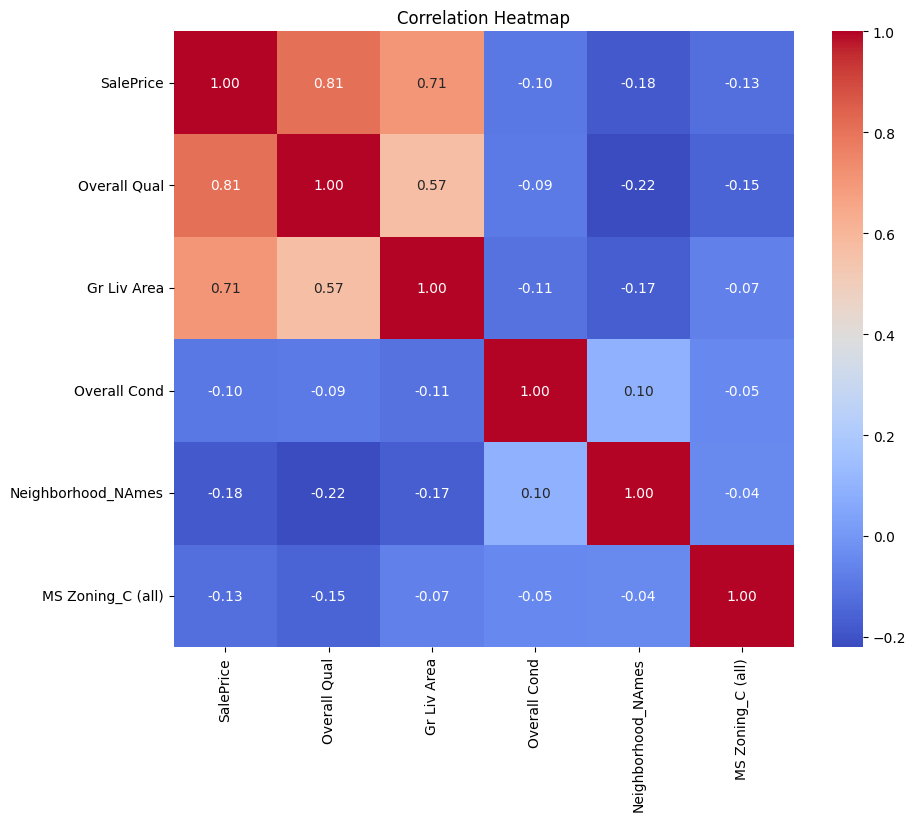

In [ ]:
correlation_matrix = housing_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

Pair Plot (Scatter Plot Matrix)

---
Shows pairwise scatterplots of features to assess linear relationships


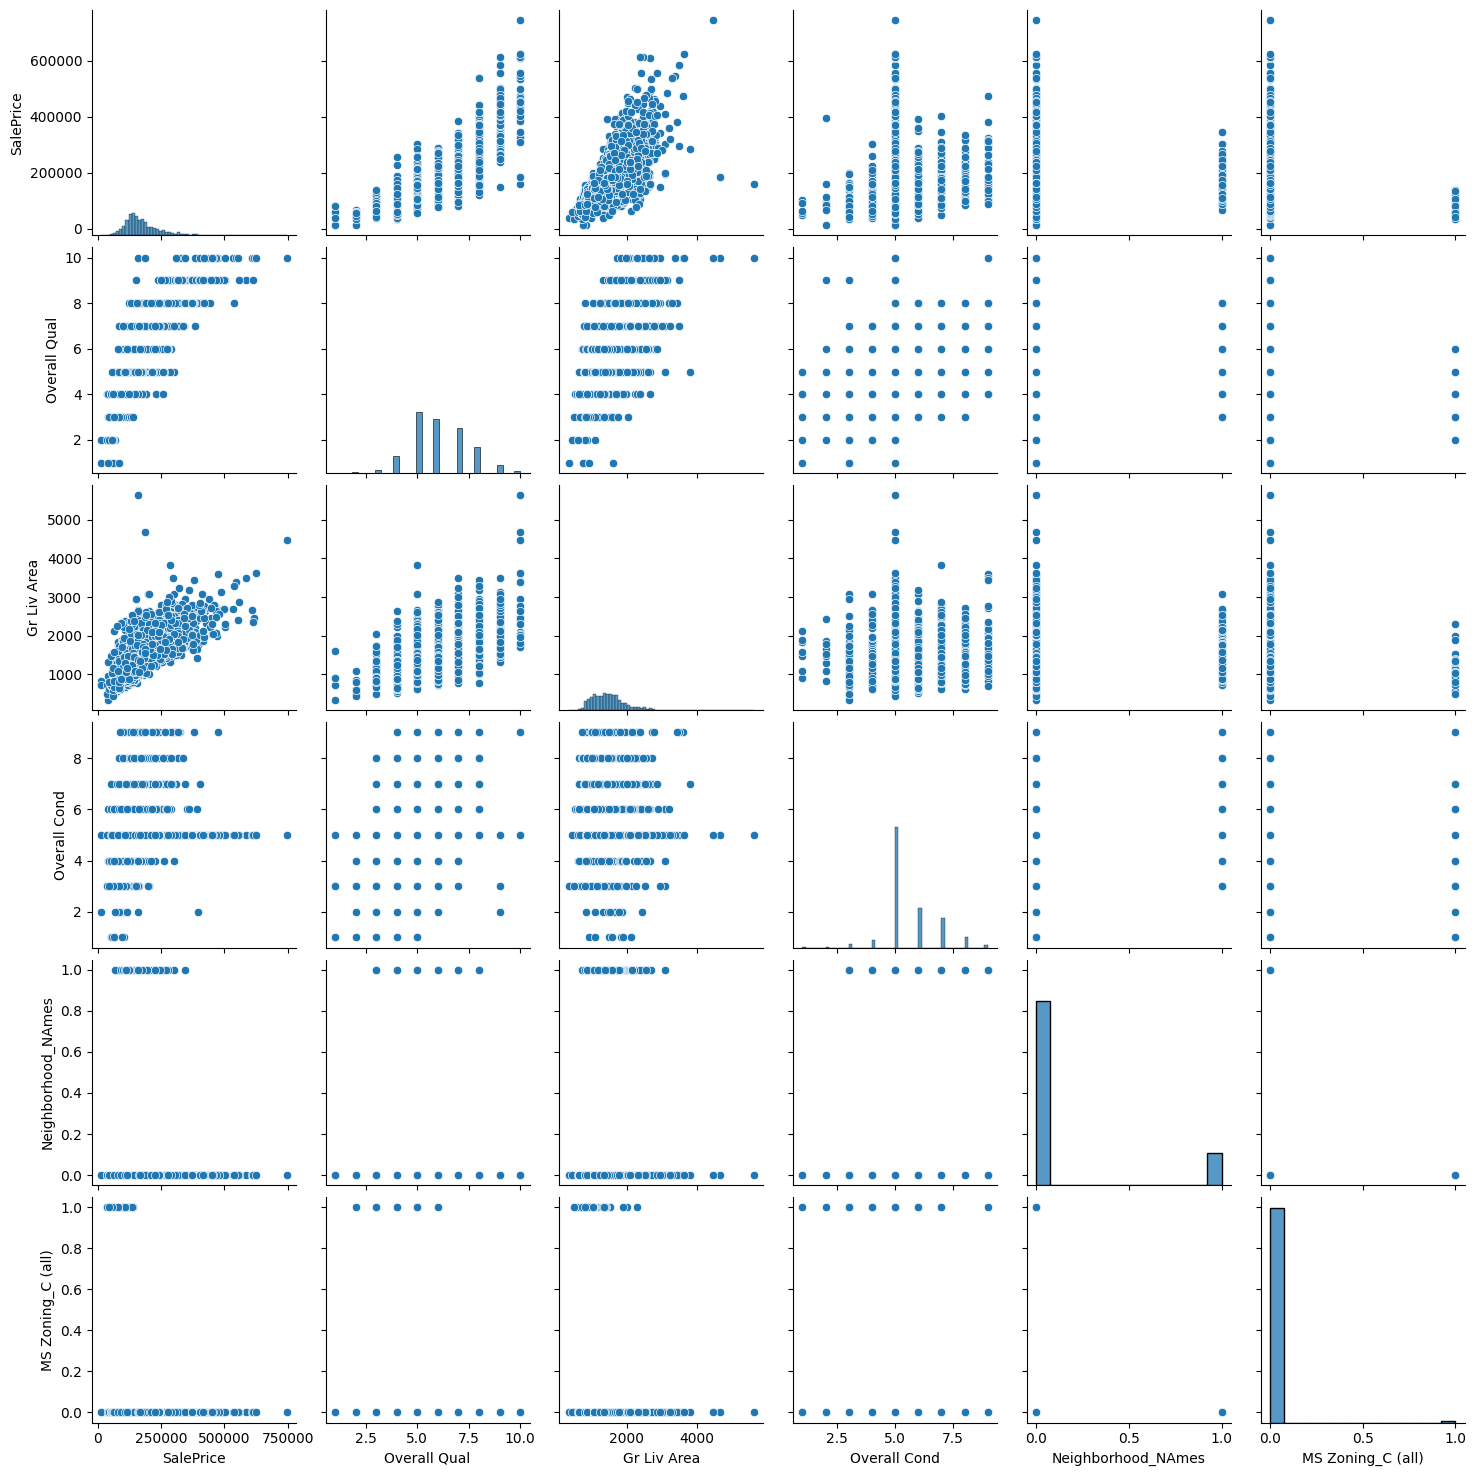

In [ ]:
snsqplot = sns.pairplot(housing_data)
plt.show()

Scatter Plot for Target Variable

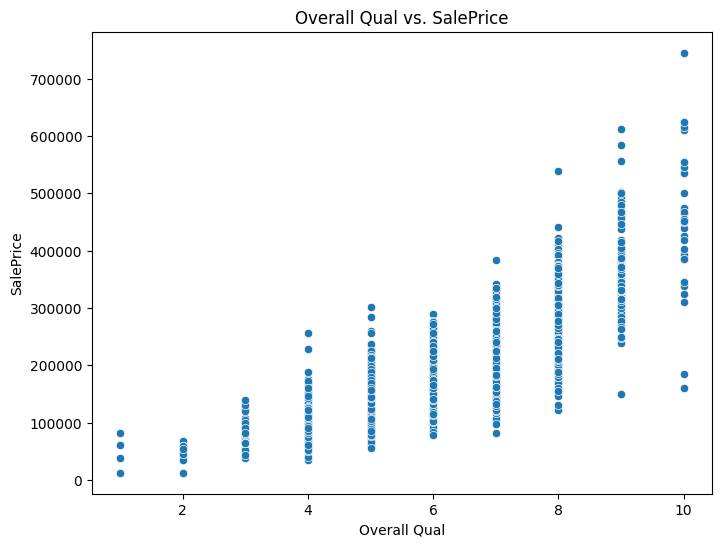

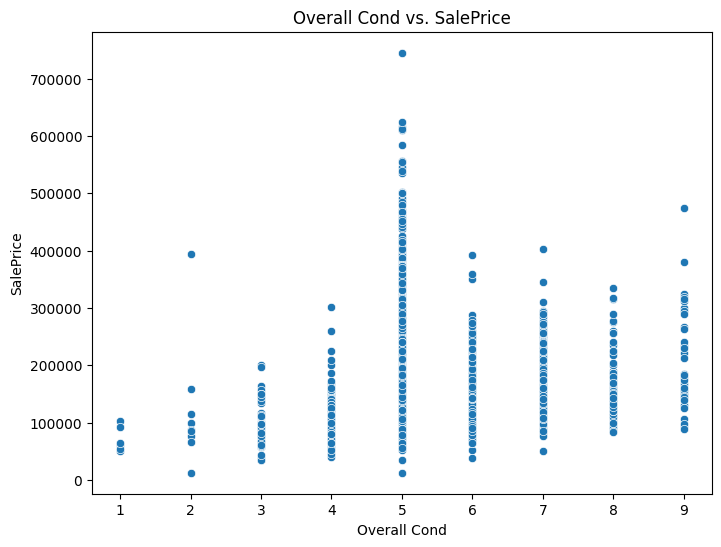

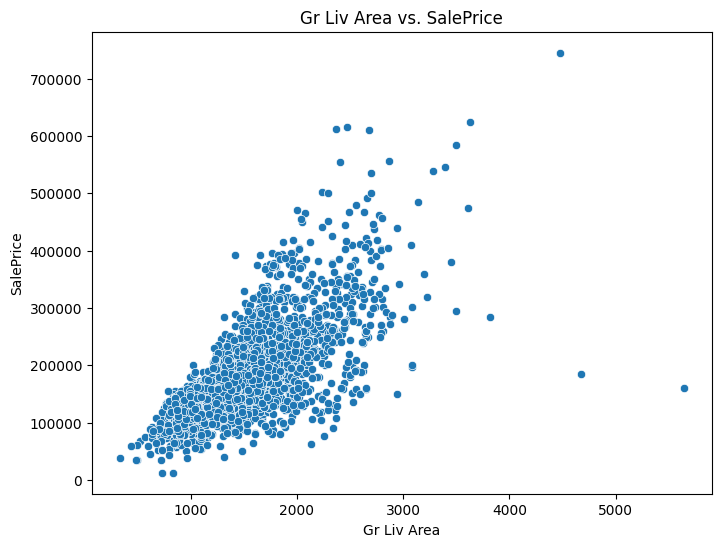

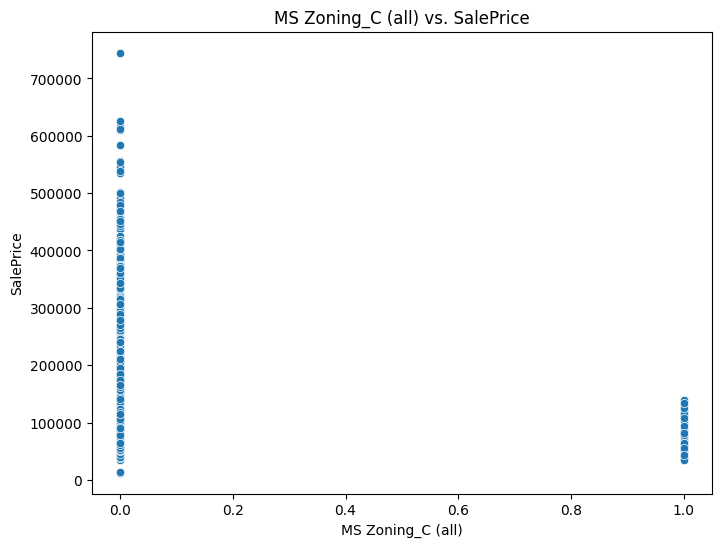

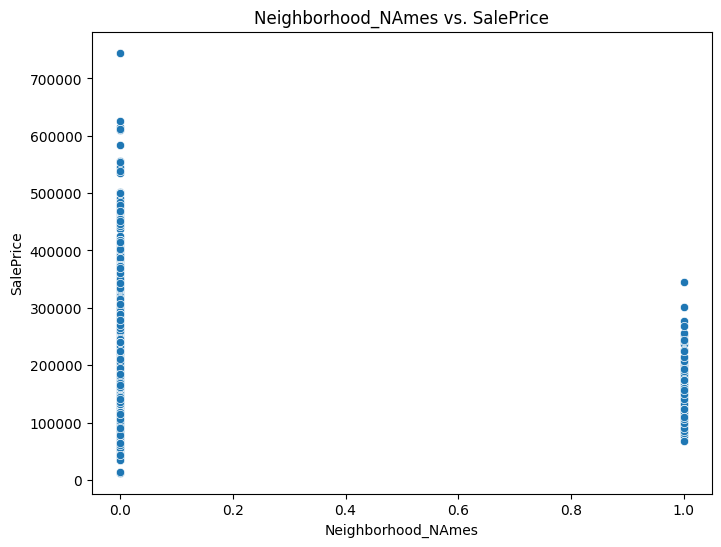

In [ ]:
# Plot each feature against the dependent variable to examine individual relationships.
for feature in features:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=feature, y="SalePrice", data=housing_data)
    plt.title(f"{feature} vs. SalePrice")
    plt.xlabel(feature)
    plt.show()

Variance Inflation Factor (VIF)

In [ ]:

# Visualize VIF values using a bar plot to identify highly collinear features

#vif_data = pd.DataFrame()
#vif_data["Feature"] = features
#vif_data["VIF"] = [variance_inflation_factor(housing_data[features].values, i) for i in range(len(features))]
#vif_data.style.background_gradient(cmap='Blues')

## Processing


Prepare the Data

In [ ]:
# Define features and target variable
X = housing_data[['Overall Qual', 'Overall Cond' , 'MS Zoning_C (all)' , 'Neighborhood_NAmes', 'Gr Liv Area']]  # Independent variables
y = housing_data['SalePrice']  # Dependent variable

Split and Train the model

In [ ]:
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= None)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

## Data Visualization/Communication of Results


Residual Plots


---


Residual plots help evaluate the fit of a regression model by **showing the differences (residuals) between observed and predicted values**. Ideally, residuals should be randomly scattered around zero with consistent variance. Patterns or deviations in the plot suggest issues like non-linearity, variable omission, or unequal error variance, requiring further model adjustments.

In [ ]:
# Residuals are the differences between actual values and predicted values
residuals = y_test - y_pred
residuals.head()

,SalePrice
2132,-40623.754824
549,-8368.881244
518,-25767.891905
1043,-30543.306928
11,37767.608523


Lets create a scatterplot to visualize residuals against predicted values relationships between features and the target variable are linear.

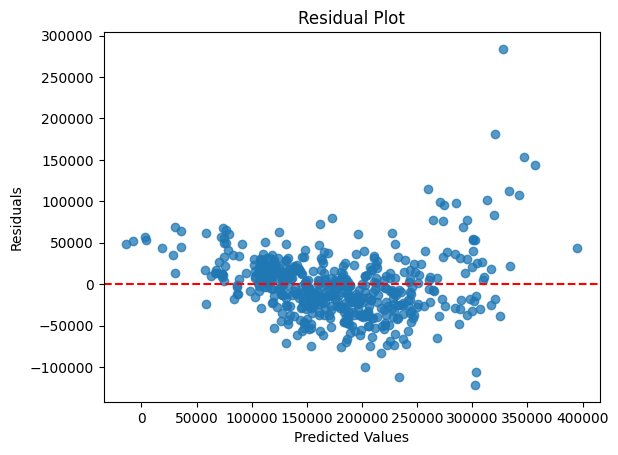

In [ ]:
plt.scatter(y_pred, residuals, alpha=0.75)
plt.axhline(y=0, color='r', linestyle='--')  # Reference line for zero residuals
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

**Root Mean Squared Percentage Error (RMSPE)**

RMSPE **measures the accuracy of a predictive model by calculating the square root of the average squared percentage errors** between observed and predicted values. It indicates the relative error as a percentage, helping assess model performance.

In [ ]:
def rmspe(y_true, y_pred):
  """ Calculate Root Mean Squared Percentage Error (RMSPE) between true and predicted values"""

  return np.sqrt(np.mean(np.square((y_true - y_pred) / y_true)))

Cross Validation Score


---


Cross-validation scores measure a model's performance by splitting the data into multiple subsets to train and test the model iteratively. They provide an estimate of the model's ability to generalize to unseen data, with higher and consistent scores indicating better reliability.

In [ ]:
rmspe_scorer = make_scorer(rmspe, greater_is_better=False)  # Flip sign if lower score is better
scores = cross_val_score(model, X, y, scoring=rmspe_scorer, cv=5)  # Example with 5-fold CV
print("Cross-Validation RMSPE Scores:", scores)
print("Average RMSPE:", -np.mean(scores))

Cross-Validation RMSPE Scores: [-0.30152992 -0.24796914 -0.2469936  -0.31447823 -0.23677198]
Average RMSPE: 0.2695485755026469


An average **RMSPE** of 27% means that, on average, the model's predictions deviate from the actual values by 27%. This indicates the model's predictive accuracy, with lower percentages generally reflecting better performance.

**Does the model perform?**

In [ ]:
# The most optimal parameters to determine overfitting or underfitting are training error and validation (or test) error
training_error = model.score(X_train, y_train)
validation_error = model.score(X_test, y_test)

print(f"Training Error: {training_error:.2f}")
print(f"Validation Error: {validation_error:.2f}")

# Interpretation
if training_error > validation_error:
    print("The model may be underfitting.")
elif training_error < validation_error:
    print("The model may be overfitting.")
else:
    print("The model seems to be well-fit.")


Training Error: 0.74
Validation Error: 0.73
The model may be underfitting.


Final Interpretation


---


If the coefficient for 'Overall Qual' is 33000.
For every one standard deviation increase in overall quality, the SalePrice is expected to increase by $33,000, holding other factors constant.

In [ ]:
overall_qual_coefficient = model.coef_[0]  # 'Overall Qual' is the first feature in the model
print(overall_qual_coefficient)

33369.4364104758
